In [1]:
import numpy as np

import math as m

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


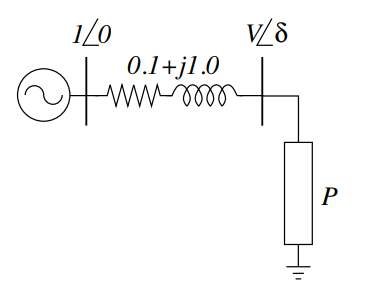


## Equações do Fluxo de pontência para a carga $S=P+j0$

## $0=-P-0.995V\cos(\theta-95.7°)-0.995V^2\cos(84.3°)$

## $0=-0.995V\sin(\theta-95.7°)-0.995V^2\sin(84.3°)$

## Utilizando primeiro o parâmetro continuado como potência:

## $\lambda K=\lambda \begin{bmatrix} -1 \\ 0     \end{bmatrix} $

## Trocando no Fluxo de potência:

## $0=-\lambda K-0.995V\cos(\theta-95.7°)-0.995V^2\cos(84.3°)$

## $0=-0.995V\sin(\theta-95.7°)-0.995V^2\sin(84.3°)$

## Variáveis iniciais $\theta, V, \lambda$

## Predição:

## $\begin{bmatrix} \theta \\ V \\ \lambda \end{bmatrix}^{predicted}= \begin{bmatrix} \theta \\ V \\ \lambda \end{bmatrix} ^i +\sigma \begin{bmatrix} J_{11} & J_{12} & K \\ J_{21} & J_{22} & 0 \\ 0 & 0 & 1   \end{bmatrix} \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}       $

## Corretor: Resolver a equação do fluxo de potência com:

## $0=-\lambda_{predicted}-0.995V\cos(\theta-95.7°)-0.995V^2\cos(84.3°)$

## $0=-0.995V\sin(\theta-95.7°)-0.995V^2\sin(84.3°)$


In [2]:
niter=4

niter2=18

niter3=3

n=niter+niter2+niter3

theta=0

V=1

Lambda=0

sigma=0.1

X=np.array([theta,V,Lambda])

theta_pred=np.ones(n)
V_pred=np.ones(n)
Lambda_pred=np.ones(n)

theta_cor=np.ones(n)
V_cor=np.ones(n)
Lambda_cor=np.ones(n)

for i in range(niter):

  J11=0.995*V*m.sin(theta-(95.7*m.pi/180))

  J12=-0.995*m.cos(theta-(95.7*m.pi/180))-1.99*V*m.cos(84.3*m.pi/180)

  J21=-0.995*V*m.cos(theta-(95.7*m.pi/180))

  J22=-0.995*m.sin(theta-(95.7*m.pi/180))-1.99*V*m.sin(84.3*m.pi/180)

  JLF=[[J11,J12],[J21,J22]]

  J=np.array([[J11,J12,-1],[J21,J22,0],[0,0,1]])

  X=X+sigma*np.dot(np.linalg.inv(J),np.array([0,0,1]))

  theta_pred[i]=X[0]
  V_pred[i]=X[1]
  Lambda_pred[i]=X[2]

  theta=X[0]

  V=X[1]

  Lambda=X[2]

  f1=-Lambda-0.995*V*m.cos(theta-(95.7*m.pi/180))-0.995*V*V*m.cos(84.3*m.pi/180)

  f2=-0.995*V*m.sin(theta-(95.7*m.pi/180))-0.995*V*V*m.sin(84.3*m.pi/180)

  Y=np.array([f1,f2])

  J11=0.995*V*m.sin(theta-(95.7*m.pi/180))

  J12=-0.995*m.cos(theta-(95.7*m.pi/180))-1.99*V*m.cos(84.3*m.pi/180)

  J21=-0.995*V*m.cos(theta-(95.7*m.pi/180))

  J22=-0.995*m.sin(theta-(95.7*m.pi/180))-1.99*V*m.sin(84.3*m.pi/180)

  JLF=np.array([[J11,J12],[J21,J22]])

  X[0:2]=X[0:2]-np.dot(np.linalg.inv(JLF),Y)

  theta_cor[i]=X[0]
  V_cor[i]=X[1]
  Lambda_cor[i]=X[2]

  theta=X[0]

  V=X[1]

  Lambda=X[2] 

In [3]:
theta=theta_cor[niter-1]

V=V_cor[niter-1]

Lambda=Lambda_cor[niter-1]

sigma=0.025

X=np.array([theta,V,Lambda])

for j in range(niter2):

  J11=0.995*V*m.sin(theta-(95.7*m.pi/180))

  J12=-0.995*m.cos(theta-(95.7*m.pi/180))-1.99*V*m.cos(84.3*m.pi/180)

  J21=-0.995*V*m.cos(theta-(95.7*m.pi/180))

  J22=-0.995*m.sin(theta-(95.7*m.pi/180))-1.99*V*m.sin(84.3*m.pi/180)

  J=np.array([[J11,J12,-1],[J21,J22,0],[0,-1,0]])

  X=X+sigma*np.dot(np.linalg.inv(J),np.array([0,0,1]))

  theta_pred[j+niter]=X[0]
  V_pred[j+niter]=X[1]
  Lambda_pred[j+niter]=X[2]

  theta=X[0]

  V=X[1]

  Lambda=X[2]

  f1=-Lambda-0.995*V*m.cos(theta-(95.7*m.pi/180))-0.995*V*V*m.cos(84.3*m.pi/180)

  f2=-0.995*V*m.sin(theta-(95.7*m.pi/180))-0.995*V*V*m.sin(84.3*m.pi/180)

  f3=0

  Y=np.array([f1,f2,f3])

  J11=0.995*V*m.sin(theta-(95.7*m.pi/180))

  J12=-0.995*m.cos(theta-(95.7*m.pi/180))-1.99*V*m.cos(84.3*m.pi/180)

  J21=-0.995*V*m.cos(theta-(95.7*m.pi/180))

  J22=-0.995*m.sin(theta-(95.7*m.pi/180))-1.99*V*m.sin(84.3*m.pi/180)

  J=np.array([[J11,J12,-1],[J12,J22,0],[0,-1,0]])

  X=X-np.dot(np.linalg.inv(J),Y)

  theta_cor[j+niter]=X[0]
  V_cor[j+niter]=X[1]
  Lambda_cor[j+niter]=X[2]

  theta=X[0]

  V=X[1]

  Lambda=X[2]

In [4]:
theta=theta_cor[niter+niter2-1]

V=V_cor[niter+niter2-1]

Lambda=Lambda_cor[niter+niter2-1]

sigma=0.1

X=np.array([theta,V,Lambda])

for i in range(niter3):

  J11=0.995*V*m.sin(theta-(95.7*m.pi/180))

  J12=-0.995*m.cos(theta-(95.7*m.pi/180))-1.99*V*m.cos(84.3*m.pi/180)

  J21=-0.995*V*m.cos(theta-(95.7*m.pi/180))

  J22=-0.995*m.sin(theta-(95.7*m.pi/180))-1.99*V*m.sin(84.3*m.pi/180)

  JLF=[[J11,J12],[J21,J22]]

  J=np.array([[J11,J12,-1],[J21,J22,0],[0,0,-1]])

  X=X+sigma*np.dot(np.linalg.inv(J),np.array([0,0,1]))

  theta_pred[i+niter+niter2]=X[0]
  V_pred[i+niter+niter2]=X[1]
  Lambda_pred[i+niter+niter2]=X[2]

  theta=X[0]

  V=X[1]

  Lambda=X[2]

  f1=-Lambda-0.995*V*m.cos(theta-(95.7*m.pi/180))-0.995*V*V*m.cos(84.3*m.pi/180)

  f2=-0.995*V*m.sin(theta-(95.7*m.pi/180))-0.995*V*V*m.sin(84.3*m.pi/180)

  Y=np.array([f1,f2])

  J11=0.995*V*m.sin(theta-(95.7*m.pi/180))

  J12=-0.995*m.cos(theta-(95.7*m.pi/180))-1.99*V*m.cos(84.3*m.pi/180)

  J21=-0.995*V*m.cos(theta-(95.7*m.pi/180))

  J22=-0.995*m.sin(theta-(95.7*m.pi/180))-1.99*V*m.sin(84.3*m.pi/180)

  JLF=np.array([[J11,J12],[J21,J22]])

  X[0:2]=X[0:2]-np.dot(np.linalg.inv(JLF),Y)

  theta_cor[i+niter+niter2]=X[0]
  V_cor[i+niter+niter2]=X[1]
  Lambda_cor[i+niter+niter2]=X[2]

  theta=X[0]

  V=X[1]

  Lambda=X[2] 

In [5]:
V_cor=list(V_cor)

V_cor.append(0)

Lambda_cor=list(Lambda_cor)

Lambda_cor.append(0)

V_cor=[1]+V_cor

Lambda_cor=[0]+Lambda_cor

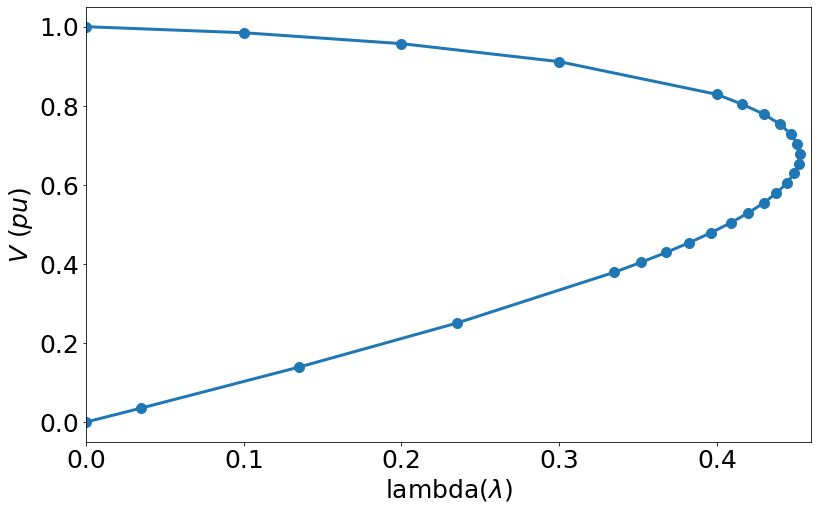

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (13,8))

axis_font = {'fontname':'sans-serif', 'size':'25'}

plt.xlabel('lambda' r'$(\lambda)$',**axis_font)
plt.ylabel(r'$V \ (pu)$',**axis_font)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

plt.xlim([0,0.46])

plt.plot(Lambda_cor,V_cor,'o-',linewidth=3.0,markersize=10)

plt.savefig('/content/drive/MyDrive/AlgoritmosDOC/Analises_Tese/CurvaP_V_CPF.eps', format='eps')

plt.show()